## **Dataset**

Features:<br>

`RowNumber` - the index of the row in the data <br>
`CustomerId` - unique customer identifier <br>
`Surname` - surname <br>
`CreditScore` - credit rating <br>
`Geography` - country of residence <br>
`Gender` - gender <br>
`Age` - age <br>
`Tenure` - how many years a person has been a client of the bank <br>
`Balance` - account balance <br>
`NumOfProducts` - the number of bank products used by the client <br>
`HasCrCard` - availability of a credit card <br>
`IsActiveMember` - client activity <br>
`EstimatedSalary` - estimated salary <br>

Target column: <br>

`Exited` - the fact of the client's departure 

**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.style.use("fivethirtyeight")
%matplotlib inline

**Read dataset**

In [2]:
banking = pd.read_csv('./data/bank_dataset.csv')
banking.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EXPLORATORY DATA ANALYSIS**

Explore the dataset

In [3]:
banking.shape

(10000, 14)

In [4]:
banking.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Checking if there is any null values

In [5]:
banking.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Checking column type

In [6]:
banking.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
continous   = ['CeditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Drop the unnecessary column (`RowNumber`, `CustomerId`, `Surname`)

In [8]:
banking.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace=True)

In [9]:
banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Visualise Exited customers data

In [10]:
#  plot the relationship between geography, gender, age, tenure ..... with Exited

banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


These graphs below are plotted to observe the relationship between the categorical variables to the target variable.

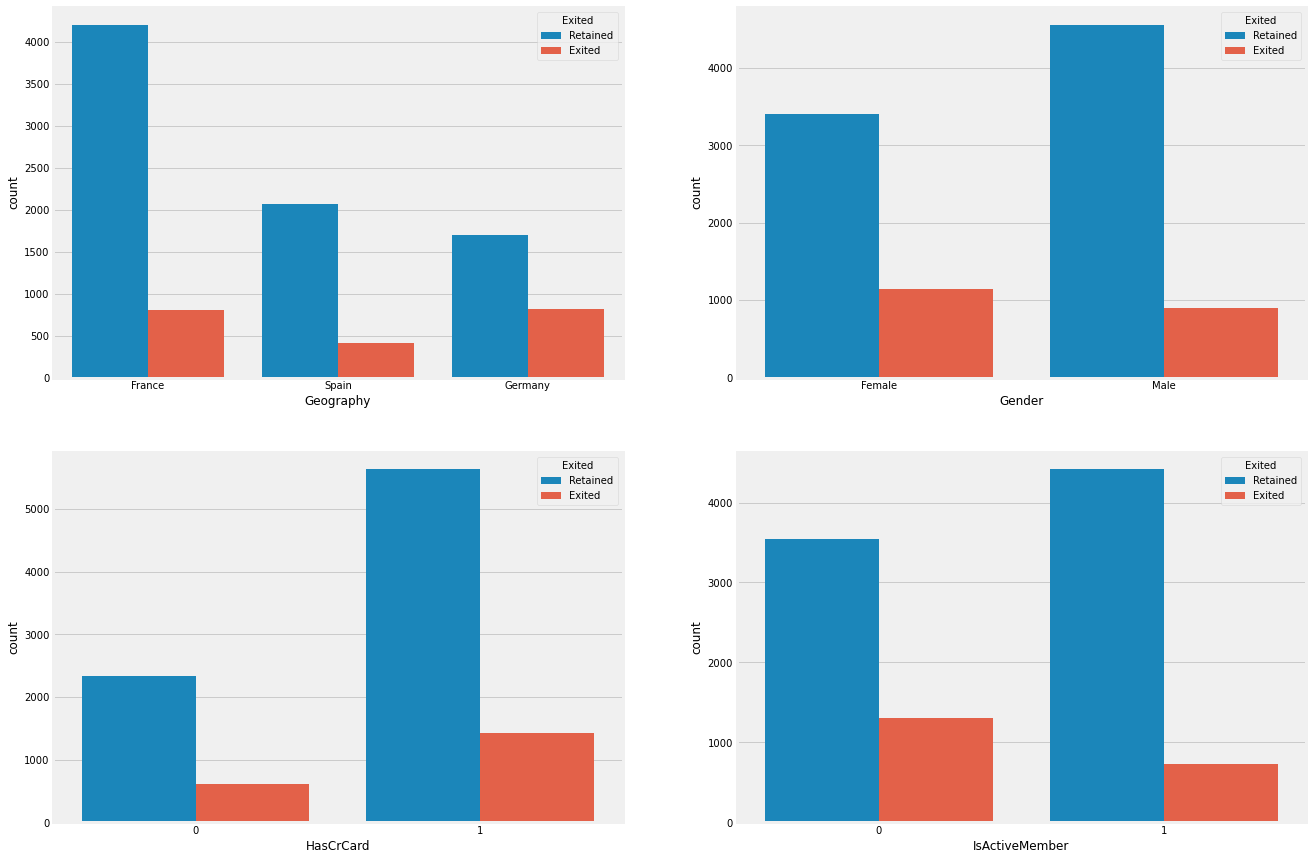

In [11]:

fig, axarr = plt.subplots(2, 2, figsize=(20, 15));

# Geography
geography_plot = sns.countplot(x='Geography', hue = 'Exited',data = banking, ax=axarr[0][0])
geography_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Gender
gender_plot = sns.countplot(x='Gender', hue = 'Exited',data = banking, ax=axarr[0][1])
gender_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Has Credit Card
cc_plot = sns.countplot(x='HasCrCard', hue = 'Exited',data = banking, ax=axarr[1][0])
cc_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Active Customer
active_plot = sns.countplot(x='IsActiveMember', hue = 'Exited',data = banking, ax=axarr[1][1])
active_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Estimated Salary
# salary_plot = sns.histplot(x='EstimatedSalary',hue = 'Exited', data = banking, ax=axarr[2][0])
# salary_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);
# banking.plot(kind='hist', x='EstimatedSalary', y='Exited', ax=axarr[2][0]);

plt.show()


From the observation, we can conclude certain criteria that most customers comes from France and most of them are male. Most of the customer that Exited has a credit card but not an active member of the bank. 

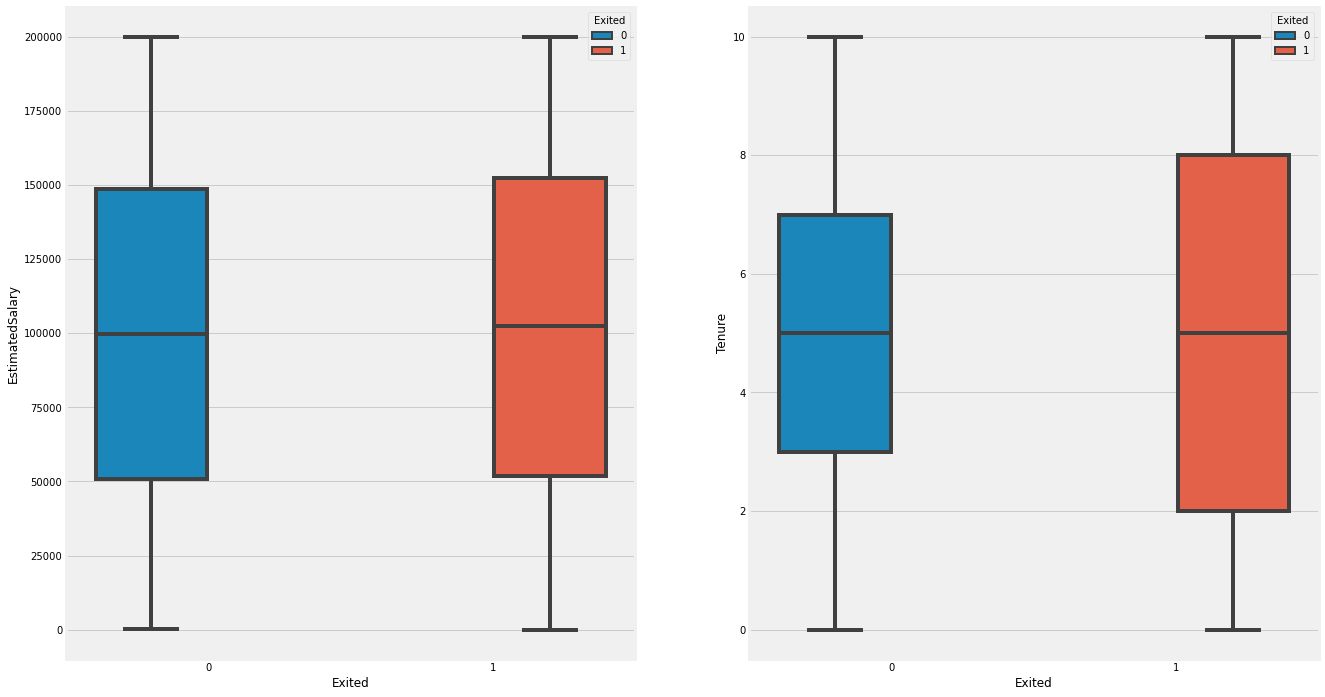

In [12]:

fig, axarr = plt.subplots(1, 2, figsize=(20, 12));

# Estimated Salary
salary_plot = sns.boxplot(x= 'Exited' ,y='EstimatedSalary', hue = 'Exited',data = banking, ax=axarr[0])
salary_plot

# Tenure
tenure_plot = sns.boxplot(x= 'Exited', y='Tenure', hue = 'Exited',data = banking, ax=axarr[1])
tenure_plot

plt.show()


In [13]:
banking.Exited.value_counts()

# 0 = Retained; 1 = Exited

0    7963
1    2037
Name: Exited, dtype: int64

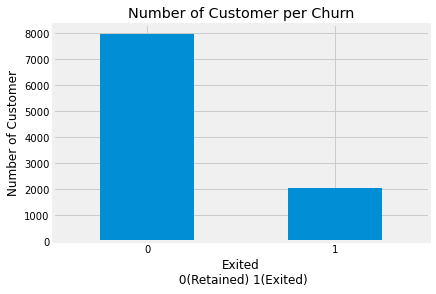

In [14]:
count_Exited = banking.Exited.value_counts()
count_Exited.plot(kind='bar');
plt.xlabel('Exited\n 0(Retained) 1(Exited)');
plt.ylabel('Number of Customer');
plt.title('Number of Customer per Churn');
plt.xticks(rotation=0);
plt.show()


<AxesSubplot:xlabel='Exited', ylabel='Age'>

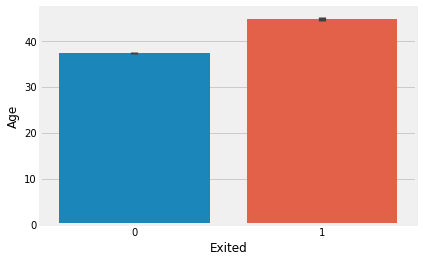

In [15]:
# sns.lmplot(x='Age', y='Exited', data=banking, aspect=1.5, scatter_kws={'alpha':0.2});

sns.barplot(data=banking, x='Exited', y='Age')

In [16]:
banking.groupby('Geography').Gender.value_counts().unstack()

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


##### Credit Score Range <br>
300-579: Poor <br>
580-669: Fair <br>
670-739: Good <br>
740-799: Very good <br>
800-850: Excellent <br>

In [17]:
meanAge_byGeo = banking.groupby('Geography')['Age'].mean()
meanCS_byGeo  = banking.groupby('Geography')['CreditScore'].mean()
meanBal_byGeo = banking.groupby('Geography')['Balance'].mean()
print(meanAge_byGeo)
print(meanCS_byGeo)
print(meanBal_byGeo)

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64
Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64
Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64


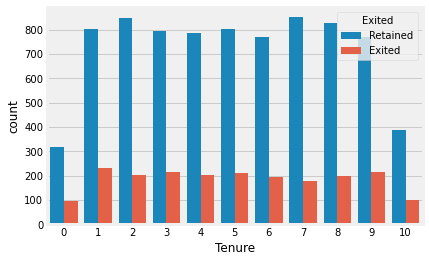

In [18]:
#fig, axarr = plt.subplots(1, 2, figsize=(15, 10));
# Tenure
fig = sns.countplot(x='Tenure', hue = 'Exited',data = banking);
#fig = sns.countplot(x='CreditScore', hue = 'Exited',data = banking, ax=axarr[1]);
fig.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);
plt.show()

Check the relationship between the data

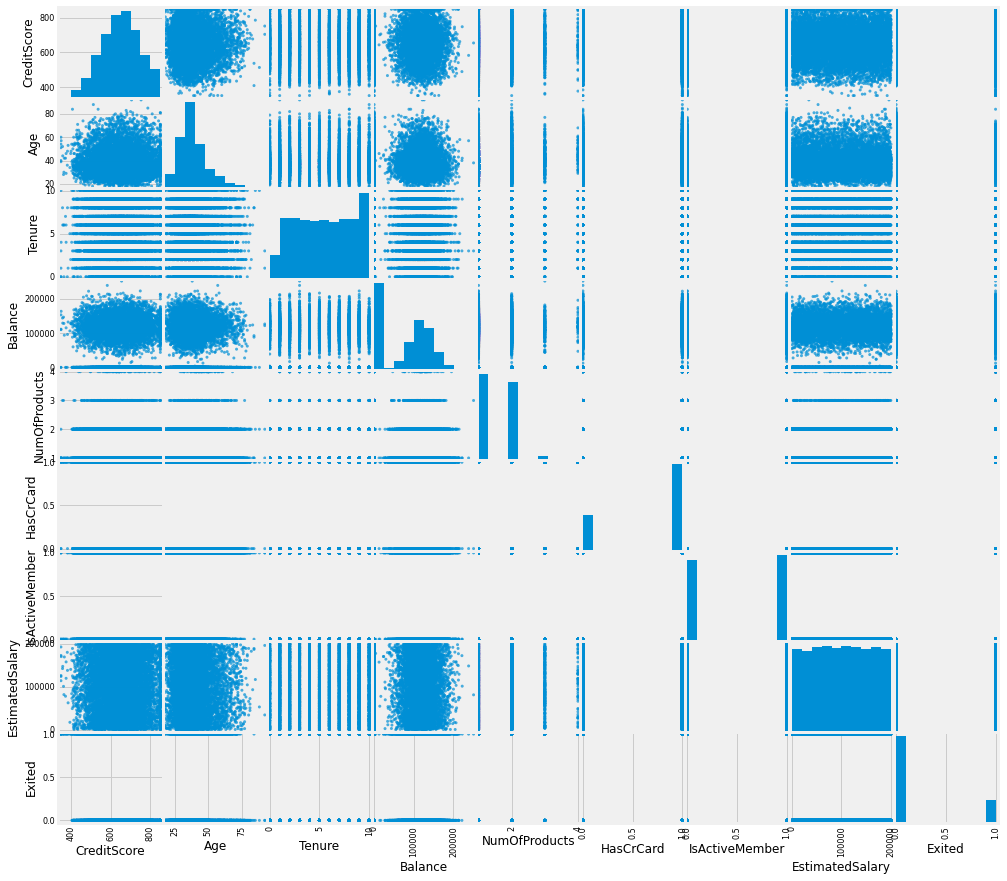

In [19]:
feature_cols = banking.columns.tolist()
grr = pd.plotting.scatter_matrix(banking[feature_cols], figsize=(15, 15), alpha=0.7)

In [20]:
banking.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


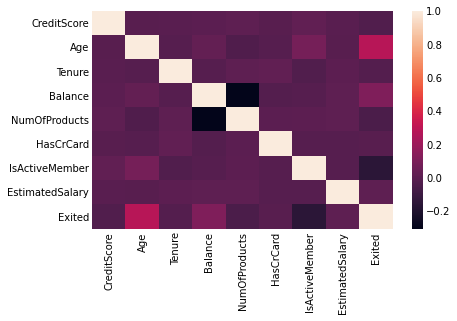

In [21]:
sns.heatmap(banking.corr());

## Modeling

In [22]:
banking_dummy = pd.get_dummies(banking)
banking_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [23]:
banking_dummy.drop(["Geography_France","Gender_Female"],axis=1, inplace=True)

In [24]:
banking_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE
# Calculate class distribution for target variable
print(Counter(banking["Exited"]))

Counter({0: 7963, 1: 2037})


In [26]:
# transform the dataset
x = banking_dummy.columns.difference(["Exited"])
oversample = SMOTE()
x_new, y_new = oversample.fit_resample(banking_dummy[x],banking_dummy["Exited"])

# summarize the new class distribution
counter = Counter(y_new)
print(counter)

Counter({1: 7963, 0: 7963})


In [27]:
# Merge independent variables and dependent variable in one dataset
x_new = pd.DataFrame(data=x_new,columns=x )
y_new = pd.DataFrame(data=y_new,columns=["Exited"])
banking_model = pd.concat([x_new, y_new], axis=1)
banking_model

,Age,Balance,CreditScore,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,42,0.000000,619,101348.880000,0,0,0,1,1,1,2,1
1,41,83807.860000,608,112542.580000,0,0,1,0,1,1,1,0
2,42,159660.800000,502,113931.570000,0,0,0,1,0,3,8,1
3,39,0.000000,699,93826.630000,0,0,0,0,0,2,1,0
4,43,125510.820000,850,79084.100000,0,0,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,57,138071.204772,684,40926.464294,0,0,0,1,0,1,5,1
15922,47,105974.246461,642,91991.860711,0,1,0,1,0,1,7,1
15923,41,104568.273741,640,22465.258204,0,0,0,0,0,1,1,1
15924,66,110218.540626,709,141868.177538,0,0,0,0,0,1,2,1


In [28]:
import warnings
from pylab import rcParams
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Import performance measure to evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
x = banking_model.drop(['Exited'], axis = 1)
y = banking_model['Exited']

In [30]:
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state=12)

print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

11944
3982
11944
3982


In [31]:
LR = LogisticRegression().fit(train_x,train_y)
predict = LR.predict(test_x)

confusion_matrix = confusion_matrix(test_y, predict)
print(confusion_matrix)

[[1299  642]
 [ 634 1407]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1941
           1       0.69      0.69      0.69      2041

    accuracy                           0.68      3982
   macro avg       0.68      0.68      0.68      3982
weighted avg       0.68      0.68      0.68      3982



In [33]:
print("Accuracy = " ,accuracy_score(test_y,predict))
print("Precision = " ,precision_score(test_y,predict))
print("Recall = " ,recall_score(test_y,predict))
print("F1 Score = " ,f1_score(test_y,predict))

Accuracy =  0.6795580110497238
Precision =  0.6866764275256223
Recall =  0.6893679568838804
F1 Score =  0.6880195599022005


In [34]:
import statsmodels.api as sm
# Built regression model
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     638.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:31:17   Log-Likelihood:                -5903.1
No. Observations:               11944   AIC:                         1.183e+04
Df Residuals:                   11932   BIC:                         1.192e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3869      0.03

In [35]:
import statsmodels.formula.api as smf

model_odds = pd.DataFrame(np.exp(lm.params), columns= ['OR'])
model_odds['z-value']= lm.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(lm.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
const,1.472368,1.603794e-29,1.376906,1.574449
Age,1.014706,0.000000e+00,1.013974,1.015438
Balance,1.000001,5.432646e-15,1.000000,1.000001
CreditScore,0.999889,5.135510e-03,0.999812,0.999967
EstimatedSalary,1.000000,7.839380e-01,1.000000,1.000000
Gender_Male,0.801689,3.309662e-182,0.789919,0.813635
Geography_Germany,1.024956,7.754577e-03,1.006527,1.043722
Geography_Spain,0.855759,3.922699e-54,0.839141,0.872705
HasCrCard,0.898253,2.043502e-45,0.885049,0.911654
IsActiveMember,0.736007,0.000000e+00,0.724989,0.747193


|Variables| Odds Ratio| Explanation|
|---|---| --- |
|Age | 1.015|For every one unit increases with age, the odd to be exited increases by 2%|
|Balance| 1.000|For every one unit increases with balance, the odd to be exited is 0%|
|Credit Score | 0.999|For every one unit increases with credit score, the odd to be exited decreases by 1%|
|Estimated Salary | 1.000| For every one unit increases with estimated salary, the odd to be exited is 0%|  
|Gender_Male | 0.799| Male customer more likely to be exited than female| 
|Geography_Germany | 1.023|Customer from France more likely to be exited than customer from Germany|  
|Geography_Spain | 0.851| Customer from Spain more likely to be exited than customer from France|    
|HasCrCard | 0.900| Customer without credit card more likely to be exited than customer with credit card|  
|IsActiveMember | 0.736| Non-active customer more likely to be exited than active customer|  
|NumOfProducts | 0.918| For every one unit increases with number of products, the odd to be exited decreases by 8%| 
|Tenure | 0.992| For every one unit increases with tenure, the odd to be exited decreases by 1%| 

In [36]:
importance = LR.coef_[0]

              feature  importance
0                 Age    1.066182
5   Geography_Germany    1.000311
1             Balance    1.000004
3     EstimatedSalary    0.999999
6     Geography_Spain    0.998663
7           HasCrCard    0.998476
9       NumOfProducts    0.998232
4         Gender_Male    0.997129
8      IsActiveMember    0.996762
10             Tenure    0.996441
2         CreditScore    0.995700


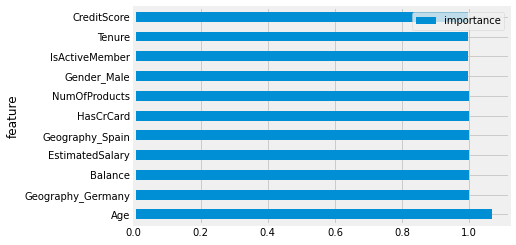

In [37]:
# Calculate the score importance
import math
X = x.columns.tolist()

feature_importance = pd.DataFrame(X, columns = ["feature"])
feature_importance["importance"] = pow(math.e, importance)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()